# Maintenance Planning Optimization for Air System - By Luciano Contri


## Introduction

GitHub Repository: [Maintenance Planning Optimization for Air System](

### Background

The company maintains a fleet of trucks for nationwide delivery. Over the past three years, the maintenance costs for the air system of these trucks have significantly increased. This increase in expenses is a concern despite the fleet size remaining relatively constant.

### Business Objective

The primary objective of this analysis is to reduce the maintenance costs associated with the air system of the trucks. By leveraging AI techniques, we aim to:
- Predict which trucks are likely to experience air system failures.
- Identify the main factors that contribute to these failures.
- Optimize the maintenance schedule to prevent costly corrective repairs.

### Data Description

We have been provided with two datasets:
- `air_system_previous_years.csv`: Historical data containing maintenance records for the years before 2022.
- `air_system_present_year.csv`: Data for the current year, which will be used for model evaluation.

Both datasets contain anonymized columns with encoded values, and some missing data is expected.

### Analytical Approach

To address the business objective, we will follow the CRISP-DM methodology, which involves the following steps:
1. **Business Understanding**: Define objectives and understand the problem.
2. **Data Understanding**: Explore and visualize the data.
3. **Data Preparation**: Clean and preprocess the data for analysis.
4. **Modeling**: Train predictive models to identify potential failures.
5. **Evaluation**: Assess the models' performance and their impact on cost savings.
6. **Deployment**: Plan for model deployment and monitoring.

This notebook will guide you through each of these steps, providing detailed insights and results at every stage. Let's begin by understanding the business requirements in more detail.


# CRISP-DM Phases and Steps

## 1. Business Understanding

Objective: 
- Decrease maintenance costs for the air system of the trucks.

Business Questions:
- Can we reduce maintenance costs using AI techniques?
- What are the main factors that indicate a possible failure in the air system?

## 2. Data Understanding

### Importing Libraries and Loading Data:

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, recall_score, make_scorer, f1_score

In [50]:
air_system_present_year = pd.read_csv('air_system_present_year.csv', sep = ',')
air_system_previous_years = pd.read_csv('air_system_previous_years.csv', sep = ',')

### Data Description:
- Explore the structure, types, and summary statistics of the data.

In [51]:
# Display basic information about the datasets
print("Present Year Data Info:")
print(air_system_present_year.info())
print("\nPrevious Years Data Info:")
print(air_system_previous_years.info())

Present Year Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB
None

Previous Years Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB
None


In [52]:
air_system_present_year.head(10)  # Display the first few rows of the data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
5,neg,174,na,26,24,0,0,na,na,na,...,na,na,na,na,na,na,na,na,0,0
6,neg,40202,na,640,606,0,0,0,0,0,...,526218,239734,439556,374248,169096,53658,41054,320,0,0
7,neg,120278,na,2130706432,256,0,0,0,0,0,...,1006722,459658,876356,689532,568540,500624,1006628,34820,0,0
8,neg,14592,0,2130706438,162,0,0,0,0,0,...,105024,57398,49152,38256,243268,145144,0,0,0,0
9,neg,28338,na,2130706432,238,0,0,0,0,0,...,357006,150056,264776,239282,140548,74750,32958,84,0,0


### Missing values:

it seems the nan values are present in the data in the form of 'na'. We need to handle these missing values.  

In [53]:
# chanage na to nan
air_system_present_year = air_system_present_year.replace('na', pd.NA)
air_system_previous_years = air_system_previous_years.replace('na', pd.NA)

Missing Values Visualization:


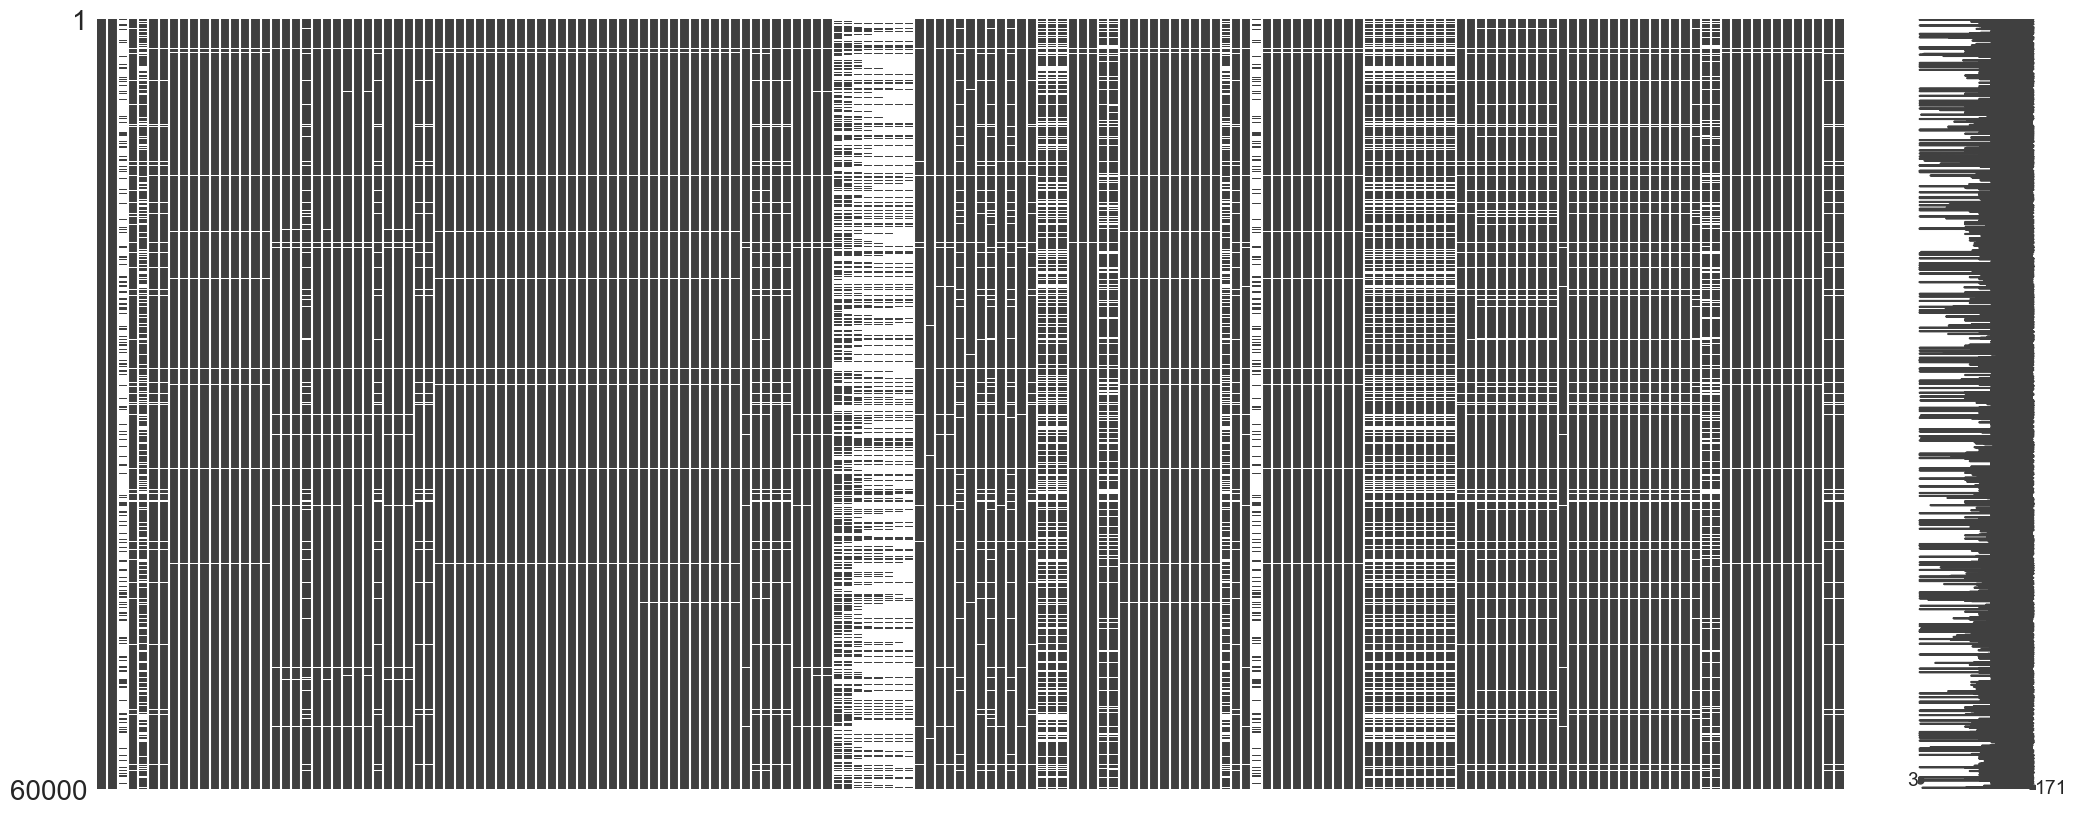

Missing Values Visualization:


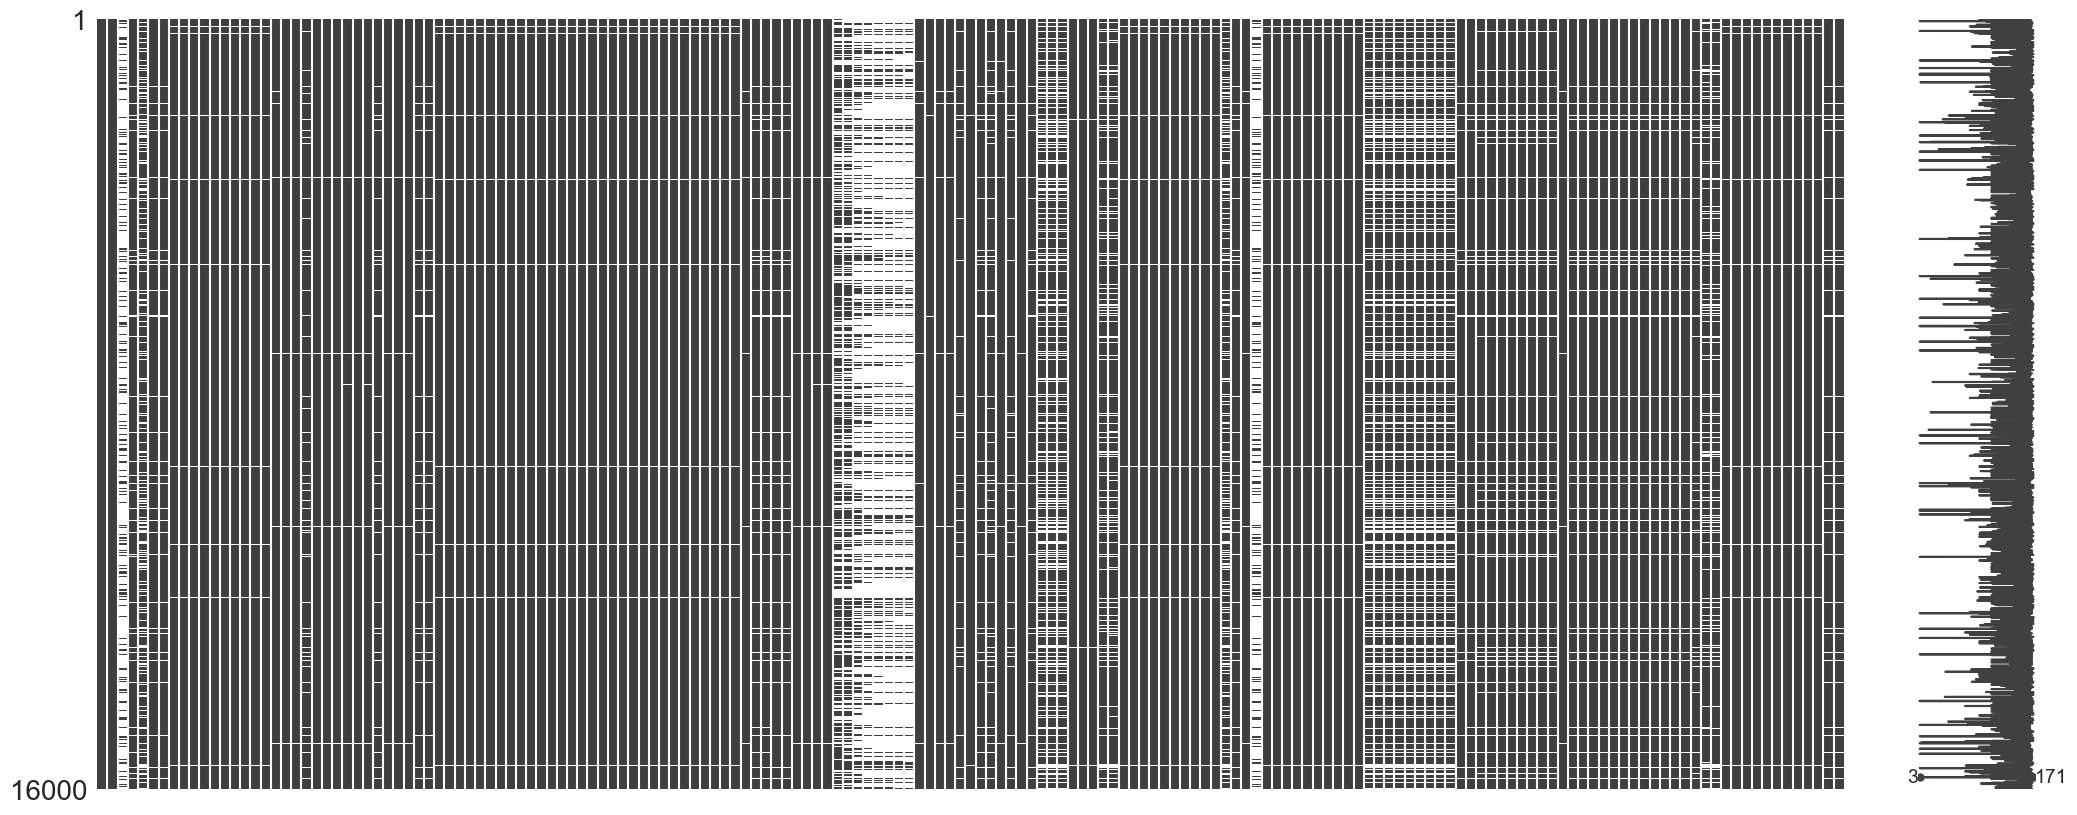

In [54]:
# Visualize missing values using missingno
print("Missing Values Visualization:")
msno.matrix(air_system_previous_years)
plt.show()

# Visualize missing values using missingno
print("Missing Values Visualization:")
msno.matrix(air_system_present_year)
plt.show()

it seems we have a lot of missing values in the data. We need to handle these missing values before proceeding further.



## 3. Data Preparation

### Data Cleaning:
- Handle missing values (e.g., imputation, removal).
- Ensure consistency and correct data types.

We dont have any information on the columns, so we can't drop the columns with missing values. We can impute the missing values with the median of the respective columns.

In [55]:
# turn all columns but class to numeric for imputation
air_system_present_year = air_system_present_year.apply(pd.to_numeric, errors='ignore')
air_system_previous_years = air_system_previous_years.apply(pd.to_numeric, errors='ignore')     

# print data types count
print("Data Types Count:")
print(air_system_present_year.dtypes.value_counts())    
print(air_system_previous_years.dtypes.value_counts())

Data Types Count:
float64    169
object       1
int64        1
dtype: int64
float64    169
object       1
int64        1
dtype: int64


In [56]:
# Impute missing values with median
air_system_present_year = air_system_present_year.fillna(air_system_present_year.median(numeric_only=True))
air_system_previous_years = air_system_previous_years.fillna(air_system_previous_years.median(numeric_only=True))

In [57]:
# Check the remaining missing values count after imputation 
print("Missing Values Count after Imputation:")
print(air_system_present_year.isnull().sum().sum()) 
print(air_system_previous_years.isnull().sum().sum())

Missing Values Count after Imputation:
0
0


Feature Engineering:
- Create new features that could help in predicting failures.

obs: since we dont have any information on the columns, we can't create new features.

### Data Integration:
- Combine datasets if necessary (e.g., merging previous year features with current year targets).
- Use standard scaler to scale the data.
- Split the data into training and testing sets. 
   
obs: we'll use the data from previous years to train the model and the data from the current year to evaluate the model.

In [58]:
# Assuming air_system_previous_years_imputed and air_system_present_year_imputed are your preprocessed dataframes
X_previous = air_system_previous_years.drop(columns=['class'])
y_previous = air_system_previous_years['class']
X_current = air_system_present_year.drop(columns=['class'])
y_current = air_system_present_year['class']

# Split the previous year's data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X_previous, y_previous, test_size=0.2, random_state=42)

# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both the training and validation data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transform the current year's data using the same scaler
X_current_scaled = scaler.transform(X_current)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_current_encoded = label_encoder.transform(y_current)

# Check the encoding of the labels
label_classes = label_encoder.classes_
print(f"Label encoding: {label_classes}")

Label encoding: ['neg' 'pos']


### Dimensionality Reduction:
- Apply feature selection methods to identify the most important features.  
- Use techniques like PCA to reduce the number of features while retaining essential information.

#### Remove Constant Features:

it was found, during the training, that the data contains constant features. So it's better to remove them before proceeding further.

In [59]:


# Remove constant features from the previous year's data
constant_filter_prev = VarianceThreshold(threshold=0)
X_train_scaled_prev = constant_filter_prev.fit_transform(X_train_scaled)
X_test_scaled_prev = constant_filter_prev.transform(X_test_scaled)

# Get the names of the remaining features in the previous year's data
remaining_features_prev = X_train.columns[constant_filter_prev.get_support()]

# Remove constant features from the current year's data
constant_filter_curr = VarianceThreshold(threshold=0)
X_current_scaled_curr = constant_filter_curr.fit_transform(X_current_scaled)

# Get the names of the remaining features in the current year's data
remaining_features_curr = X_current.columns[constant_filter_curr.get_support()]

# Find the common remaining features between both datasets
common_features = list(set(remaining_features_prev) & set(remaining_features_curr))
X_train_scaled_common = pd.DataFrame(X_train_scaled, columns=X_train.columns)[common_features]
X_test_scaled_common = pd.DataFrame(X_test_scaled, columns=X_train.columns)[common_features]
X_current_scaled_common = pd.DataFrame(X_current_scaled, columns=X_current.columns)[common_features]

#### Feature Selection Techniques:
- Random Forest Feature Importance
- Recursive Feature Elimination (RFE)
- SelectKBest with ANOVA F-test
- Lasso Feature Importance

We'll use these techniques to select the most important features and create a ranking of features based on their importance.


In [60]:

# Random Forest Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_common, y_train_encoded)
rf_importances = pd.Series(rf_model.feature_importances_, index=common_features)

# RFE with Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=lr_model, n_features_to_select=50)
rfe.fit(X_train_scaled_common, y_train_encoded)
rfe_support = pd.Series(rfe.support_, index=common_features)

# SelectKBest with ANOVA F-test
kbest = SelectKBest(score_func=f_classif, k=50)
kbest.fit(X_train_scaled_common, y_train_encoded)
kbest_support = pd.Series(kbest.get_support(), index=common_features)

# Lasso Feature Importance
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled_common, y_train_encoded)
lasso_coefficients = pd.Series(lasso.coef_, index=common_features)
lasso_support = (lasso_coefficients != 0).astype(int)

In [61]:
# Rank the features based on Random Forest importances
rf_rank = rf_importances.rank(ascending=False)

# Rank the features based on RFE support (True/False)
rfe_rank = rfe_support.rank(ascending=False)

# Rank the features based on SelectKBest support (True/False)
kbest_rank = kbest_support.rank(ascending=False)

# Rank the features based on Lasso coefficients (non-zero/zero)
lasso_rank = lasso_support.rank(ascending=False)


In [62]:
# Combine the ranks
combined_ranks = pd.DataFrame({
    'RandomForest': rf_rank,
    'RFE': rfe_rank,
    'SelectKBest': kbest_rank,
    'Lasso': lasso_rank
})

# Average the ranks
combined_ranks['AverageRank'] = combined_ranks.mean(axis=1)

# Select top n features based on average rank
top_20_features = combined_ranks.nsmallest(20, 'AverageRank').index.tolist()    # Select top 20 features    
top_50_features = combined_ranks.nsmallest(50, 'AverageRank').index.tolist()    # Select top 50 features    
print(f"Top 20 features:", top_20_features)
print(f"Top 50 features:", top_50_features)

Top 20 features: ['bj_000', 'aq_000', 'ee_005', 'ag_003', 'cn_001', 'aa_000', 'ck_000', 'am_0', 'ci_000', 'bu_000', 'bt_000', 'cq_000', 'bh_000', 'ee_007', 'ay_008', 'cs_002', 'bv_000', 'bi_000', 'ee_002', 'by_000']
Top 50 features: ['bj_000', 'aq_000', 'ee_005', 'ag_003', 'cn_001', 'aa_000', 'ck_000', 'am_0', 'ci_000', 'bu_000', 'bt_000', 'cq_000', 'bh_000', 'ee_007', 'ay_008', 'cs_002', 'bv_000', 'bi_000', 'ee_002', 'by_000', 'cn_002', 'cj_000', 'ee_003', 'cn_003', 'ba_006', 'ag_001', 'ap_000', 'bb_000', 'dn_000', 'ay_006', 'ao_000', 'bg_000', 'cn_004', 'ah_000', 'cs_004', 'cc_000', 'an_000', 'ba_001', 'bx_000', 'ag_006', 'ag_004', 'ag_005', 'bk_000', 'ee_000', 'ay_007', 'ee_004', 'ba_000', 'cs_003', 'ee_008', 'cn_006']


#### PCA:
Using PCA on the 50 most important features to reduce the dimensionality of the data for comparison.   

In [63]:
# Apply PCA to the 50 most important features
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled_common[top_50_features]) 
X_test_pca = pca.transform(X_test_scaled_common[top_50_features])

# Transform the current year's data using the same PCA model
X_current_pca = pca.transform(X_current_scaled_common[top_50_features])


## 4. Modeling

### Model Selection:
- appropriate models for binary classification: 
    - Random Forest
    - Gradient Boosting
    - Logistic Regression
- Train multiple models using the selected features techniques. 
- Evaluate the models using appropriate metrics. 



In [64]:
# Random Forest Classifier  
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_common[top_20_features], y_train_encoded)
rf_score = rf_model.score(X_test_scaled_common[top_20_features], y_test_encoded)    
y_pred_rf = rf_model.predict(X_test_scaled_common[top_20_features])
rf_class_report = classification_report(y_test_encoded, y_pred_rf)  
print(f"Random Forest Score:", rf_score)    
print(rf_class_report)      

# Random Forest Classifier with PCA for comparison  
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train_encoded)
rf_score_pca = rf_model_pca.score(X_test_pca, y_test_encoded)   
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
rf_class_report_pca = classification_report(y_test_encoded, y_pred_rf_pca)  
print(f"Random Forest Score with PCA:", rf_score_pca)
print(rf_class_report_pca)



# Gradient Boosting Classifier      
gb_model = GradientBoostingClassifier(random_state=42)  
gb_model.fit(X_train_scaled_common[top_20_features], y_train_encoded)
gb_score = gb_model.score(X_test_scaled_common[top_20_features], y_test_encoded)
y_pred_gb = gb_model.predict(X_test_scaled_common[top_20_features]) 
gb_class_report = classification_report(y_test_encoded, y_pred_gb)
print(f"Gradient Boosting Score:", gb_score)
print(gb_class_report)


# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled_common[top_20_features], y_train_encoded)
lr_score = lr_model.score(X_test_scaled_common[top_20_features], y_test_encoded)
y_pred_lr = lr_model.predict(X_test_scaled_common[top_20_features]) 

lr_class_report = classification_report(y_test_encoded, y_pred_lr)
print(f"Logistic Regression Score:", lr_score)      
print(lr_class_report) 

Random Forest Score: 0.9923333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11788
           1       0.87      0.67      0.76       212

    accuracy                           0.99     12000
   macro avg       0.93      0.83      0.88     12000
weighted avg       0.99      0.99      0.99     12000

Random Forest Score with PCA: 0.9905833333333334
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11788
           1       0.81      0.61      0.70       212

    accuracy                           0.99     12000
   macro avg       0.90      0.81      0.85     12000
weighted avg       0.99      0.99      0.99     12000

Gradient Boosting Score: 0.99025
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11788
           1       0.80      0.59      0.68       212

    accuracy                           0.99     12000
   mac

Assessing Model Performance:

as we can see, the Random Forest model has the highest score. The PCA model has a slightly lower score but still performs well.
But the recall is very low for all the models, probably due to the class imbalance. We can try to set weights for the classes to balance the recall and change the threshold for the probability to classify.   

### Hyperparameter Tuning:

- Optimize model parameters using Random Search.
- Define custom scoring functions for cost savings and recall.  

#### Custom Scoring Functions:  

In [65]:
# Define a custom scorer for recall of class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# Custom cost-saving function
def cost_saving_function(y_true, y_pred):
    saving_tp = 475  # Savings for each true positive
    cost_fp = 10     # Cost for each false positive

    # Calculate True Positives (TP) and False Positives (FP)
    TP = sum((y_true == 1) & (y_pred == 1))
    FP = sum((y_true == 0) & (y_pred == 1))

    # Calculate total savings
    total_savings = (TP * saving_tp) - (FP * cost_fp)

    return total_savings

# Create a custom scorer for cost savings
cost_saving_scorer = make_scorer(cost_saving_function, greater_is_better=True)

#### RandomizedSearchCV:

In [66]:
# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'class_weight': ['balanced', 'balanced_subsample']
# }
# 
# # initialize Random Forest model    
# rf_model = RandomForestClassifier(random_state=42)  
# 
# # Perform RandomizedSearchCV    
# rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, scoring=cost_saving_scorer, verbose=2, n_jobs= 3, random_state=42)
# 
# # Fit the model on the training data using the top 20 features  
# rf_random_search.fit(X_train_scaled_common[top_20_features], y_train_encoded)
# 
# # Get the best model
# best_rf_model = rf_random_search.best_estimator_
# 
# # Evaluate the best model
# y_pred_rf_best = best_rf_model.predict(X_test_scaled_common[top_20_features])
# best_rf_score = best_rf_model.score(X_test_scaled_common[top_20_features], y_test_encoded)  
# best_rf_class_report = classification_report(y_test_encoded, y_pred_rf_best)
# print(f"Best Random Forest Parameters:", rf_random_search.best_params_)
# print(f"Best Random Forest Score:", best_rf_score)  
# print(best_rf_class_report)

### Best Recall Model:
Using Recall custom scorer to find the best model.  

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'class_weight': 'balanced_subsample', 'bootstrap': False}

Best Random Forest Score: 0.9769166666666667

                  precision    recall  f1-score   support
    
               0       1.00      0.98      0.99     11788
               1       0.43      0.90      0.58       212
        accuracy                           0.98     12000
       macro avg       0.71      0.94      0.78     12000
    weighted avg       0.99      0.98      0.98     12000


In [67]:
# re-train the model with the best parameters found for Recall
rf_best_recall = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features='log2', max_depth=10, class_weight='balanced_subsample', bootstrap=False, random_state=42)      
rf_best_recall.fit(X_train_scaled_common[top_20_features], y_train_encoded)
rf_best_recall_score = rf_best_recall.score(X_test_scaled_common[top_20_features], y_test_encoded)
y_pred_rf_best_recall = rf_best_recall.predict(X_test_scaled_common[top_20_features])

In [68]:
class_report_rf_best_recall = classification_report(y_test_encoded, y_pred_rf_best_recall)
print(f"Random Forest Best Score:", rf_best_recall_score)
print(class_report_rf_best_recall)

Random Forest Best Score: 0.9769166666666667
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11788
           1       0.43      0.90      0.58       212

    accuracy                           0.98     12000
   macro avg       0.71      0.94      0.78     12000
weighted avg       0.99      0.98      0.98     12000



### Best Cost Savings Scorer Model:
Using Cost Savings custom scorer to find the best model.    

Best Random Forest Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': False}

Best Random Forest Score: 0.9774166666666667

                          precision    recall  f1-score   support
            
                       0       1.00      0.98      0.99     11788
                       1       0.43      0.91      0.59       212
            
                accuracy                           0.98     12000
               macro avg       0.72      0.94      0.79     12000
            weighted avg       0.99      0.98      0.98     12000

In [69]:
# re-train the model with the best parameters found for Cost Savings    

rf_best_custom = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=10, class_weight='balanced', bootstrap=False, random_state=42)    
rf_best_custom.fit(X_train_scaled_common[top_20_features], y_train_encoded)
rf_best_custom_score = rf_best_custom.score(X_test_scaled_common[top_20_features], y_test_encoded)  
y_pred_rf_best_custom = rf_best_custom.predict(X_test_scaled_common[top_20_features])

In [70]:
class_report_rf_best_custom = classification_report(y_test_encoded, y_pred_rf_best_custom)
print(f"Random Forest Best Score:", rf_best_custom_score)
print(class_report_rf_best_custom)

Random Forest Best Score: 0.9774166666666667
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11788
           1       0.43      0.91      0.59       212

    accuracy                           0.98     12000
   macro avg       0.72      0.94      0.79     12000
weighted avg       0.99      0.98      0.98     12000



### Threshold Cost Analysis:

Cost Analysis:  


- False positive (FP) costs: 10
- True positive (TP) saves: 475
- False negatives does'nt change the baseline cost: 500



We can adjust the threshold for the probability to classify to calculate the best cost savings for each model.

In [71]:
from sklearn.metrics import precision_score

# adjusting the threshold for the probability to classify to calculate the best cost savings 

# Get the predicted probabilities for class 1 in the current year's data

y_prob_rf_recall = rf_best_recall.predict_proba(X_test_scaled_common[top_20_features])[:, 1]
y_prob_rf_custom = rf_best_custom.predict_proba(X_test_scaled_common[top_20_features])[:, 1]
y_prob_rf = rf_model.predict_proba(X_test_scaled_common[top_20_features])[:, 1]    
y_prob_lr = lr_model.predict_proba(X_test_scaled_common[top_20_features])[:, 1] 
y_prob_gb = gb_model.predict_proba(X_test_scaled_common[top_20_features])[:, 1]

def find_best_threshold(y_true, y_pred_prob):
    thresholds = np.arange(0.1, 1.0, 0.1)
    best_threshold = 0
    best_cost_savings = -np.inf
    cost_fp, saving_tp = 10, 475

    for threshold in thresholds:
        y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

        FP = sum((y_true == 0) & (y_pred_adjusted == 1))
        TP = sum((y_true == 1) & (y_pred_adjusted == 1))

        cost_savings = (TP * saving_tp) - (FP * cost_fp)

        if cost_savings > best_cost_savings:
            best_threshold = threshold
            best_cost_savings = cost_savings

    return best_threshold, best_cost_savings

In [73]:
# Find the best threshold for Random Forest model with best recall  
best_threshold_rf_recall, best_cost_savings_rf_recall = find_best_threshold(y_test_encoded, y_prob_rf_recall)

# Find the best threshold for Random Forest model with best cost savings
best_threshold_rf_custom, best_cost_savings_rf_custom = find_best_threshold(y_test_encoded, y_prob_rf_custom)

# Find the best threshold for Random Forest model
best_threshold_rf, best_cost_savings_rf = find_best_threshold(y_test_encoded, y_prob_rf)

# Find the best threshold for Logistic Regression model 
best_threshold_lr, best_cost_savings_lr = find_best_threshold(y_test_encoded, y_prob_lr)

# Find the best threshold for Gradient Boosting model
best_threshold_gb, best_cost_savings_gb = find_best_threshold(y_test_encoded, y_prob_gb)

## 5. Evaluation

Model Performance:
- Compare model performance on validation data.
- Evaluate the best model using the current year's data. 
- compare the cost savings of the models.



### Model Evaluation on Validation Data(Current Year):

In [101]:
# Evaluate the models on the current year's data using the best threshold   
y_prob_rf_recall_current = rf_best_recall.predict_proba(X_current_scaled_common[top_20_features])[:, 1] >= best_threshold_rf_recall    
y_prob_rf_custom_current = rf_best_custom.predict_proba(X_current_scaled_common[top_20_features])[:, 1] >= best_threshold_rf_custom
y_prob_rf_current = rf_model.predict_proba(X_current_scaled_common[top_20_features])[:, 1] >= best_threshold_rf
y_prob_lr_current = lr_model.predict_proba(X_current_scaled_common[top_20_features])[:, 1] >= best_threshold_lr
y_prob_gb_current = gb_model.predict_proba(X_current_scaled_common[top_20_features])[:, 1] >= best_threshold_gb

def total_costs(y_true, y_pred):    
    
    FP = sum((y_true == 0) & (y_pred == 1)) # False Positives cost 10 
    TP = sum((y_true == 1) & (y_pred == 1)) # True Positives cost 25
    FN = sum((y_true == 1) & (y_pred == 0)) # False Negatives cost 500  
    # True Negatives cost 0
    cost = (FP * 10) + (TP * 25) + (FN * 500)      
    return cost

# Calculate the total cost for each model   
cost_rf_recall = total_costs(y_current_encoded, y_prob_rf_recall_current)
cost_rf_custom = total_costs(y_current_encoded, y_prob_rf_custom_current)   
cost_rf = total_costs(y_current_encoded, y_prob_rf_current) 
cost_lr = total_costs(y_current_encoded, y_prob_lr_current) 
cost_gb = total_costs(y_current_encoded, y_prob_gb_current)
total_cost_2020 = 37000

models = ['Current Cost(2020) - No Model','Random Forest (Recall)', 'Random Forest (Custom)', 'Random Forest', 'Logistic Regression', 'Gradient Boosting']
costs = [total_cost_2020, cost_rf_recall, cost_rf_custom, cost_rf, cost_lr, cost_gb]

# Create a DataFrame for sorting
df = pd.DataFrame({
    'Model': models,
    'Costs': costs
})

# Sort the DataFrame by Cost Savings
df_sorted = df.sort_values(by='Costs', ascending=False)

### Plot comparison of cost savings for each model.

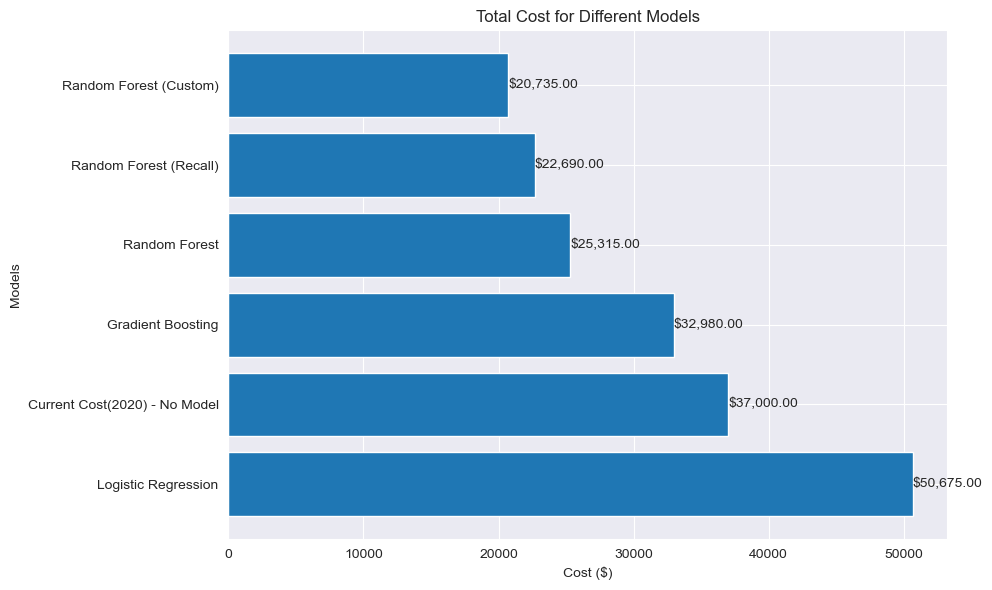

In [104]:
# Plot the results
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.barh(df_sorted['Model'], df_sorted['Costs'])
plt.ylabel('Models')
plt.xlabel('Cost ($)')
plt.title('Total Cost for Different Models')

# Add data labels
for bar in bars:
    # Get the width (i.e., the cost) and the height (y position) of the bar
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    # Add the text label centered on the bar
    plt.text(width, y_pos, f'${width:,.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

### Model Evaluation Summary:   

The Random Forest model with custom scoring has the highest cost savings. But the Random Forest model with recall scoring also performs well.
Only the baseline Logistic Regression model has a lower cost savings compared to current year's cost. but we managed to reduce the cost by U$16,265 dollars using the best model.   

## 6. Deployment

Model Deployment:
- Plan deployment using containerization (e.g., Docker) and expose the model as an API.

Monitoring and Maintenance:
- Set up monitoring for model performance and data consistency.
- Plan for periodic retraining based on performance metrics.

Here's the filled-in responses to the questions based on your provided notebook steps:

### 1. What steps would you take to solve this problem? Please describe as completely and clearly as possible all the steps that you see as essential for solving the problem.

1. **Business Understanding**: Define the objectives, understand the maintenance costs, and identify key business questions.
2. **Data Understanding**: Import and explore the datasets, check for missing values, and visualize the data.
3. **Data Preparation**: Handle missing values, transform data types, scale the data, and split it into training and test sets.
4. **Feature Engineering**: Select and engineer features, apply feature selection techniques, and perform dimensionality reduction.
5. **Modeling**: Train multiple models (Random Forest, Gradient Boosting, Logistic Regression), evaluate them, and perform hyperparameter tuning.
6. **Evaluation**: Assess model performance, adjust decision thresholds to optimize cost savings, and compare models.
7. **Deployment**: Plan for model deployment, monitoring, and periodic retraining.

### 2. Which technical data science metric would you use to solve this challenge? Ex: absolute error, rmse, etc.

- **Recall**: To ensure the model identifies as many defective trucks as possible.
- **Custom Cost-Saving Metric**: To directly optimize for financial savings based on the cost structure.

### 3. Which business metric would you use to solve the challenge?

- **Cost Savings**: The primary business metric is the reduction in maintenance costs, calculated by considering the savings from true positives and the costs from false positives.

### 4. How do technical metrics relate to the business metrics?

- **Recall** relates to **Cost Savings**: Higher recall means more defective trucks are identified, reducing the high costs of corrective maintenance.
- **Precision** impacts **Cost Savings**: While precision is not directly optimized, lower false positives help reduce unnecessary inspection costs.
- **Custom Cost-Saving Metric**: Directly translates model performance into business financial terms.

### 5. What types of analyses would you like to perform on the customer database?

- **Missing Values Analysis**: To understand the extent and pattern of missing data.
- **Feature Correlation Analysis**: To identify relationships between features and the target variable.
- **Class Distribution Analysis**: To understand the imbalance in the target classes.
- **Cost Analysis**: To evaluate the financial impact of different prediction outcomes.

### 6. What techniques would you use to reduce the dimensionality of the problem?

- **Principal Component Analysis (PCA)**: To reduce the number of features while retaining essential information.
- **Feature Selection Techniques**: To identify the most important features, such as Random Forest Feature Importance and Recursive Feature Elimination.
- **Variance Threshold**: To remove constant features that provide no variance in the data.

### 7. What techniques would you use to select variables for your predictive model?

- **Random Forest Feature Importance**
- **Recursive Feature Elimination (RFE)**
- **SelectKBest with ANOVA F-test**
- **Lasso Regression**

### 8. What predictive models would you use or test for this problem? Please indicate at least 3.

- **Random Forest Classifier**
- **Gradient Boosting Classifier**
- **Logistic Regression**

### 9. How would you rate which of the trained models is the best?

- **Custom Cost-Saving Metric**: Evaluate models based on their financial impact.
- **Recall for Class 1**: To ensure the model effectively identifies defective trucks.
- **F1 Score**: To balance precision and recall.

### 10. How would you explain the result of your model? Is it possible to know which variables are most important?

- **Feature Importance**: Use the feature importances from models like Random Forest and Lasso to explain which features contribute most to the predictions.
- **Model Metrics**: Present recall, precision, and cost savings to demonstrate the model's effectiveness.

### 11. How would you assess the financial impact of the proposed model?

- **Cost Analysis**: Compare the maintenance costs with and without the model using the custom cost-saving metric.
- **Scenario Simulation**: Evaluate different decision thresholds to find the optimal balance of recall and cost savings.

### 12. What techniques would you use to perform the hyperparameter optimization of the chosen model?

- **RandomizedSearchCV**: To explore a wide range of hyperparameters efficiently.
- **Custom Scorers**: Use recall and cost-saving metrics to guide the optimization process.
- **Threshold Adjustment**: Fine-tune the decision thresholds to optimize cost savings.

### 13. What risks or precautions would you present to the customer before putting this model into production?

- **Data Drift**: The model's performance may degrade over time if the data distribution changes.
- **Class Imbalance**: The model may struggle with imbalanced classes, leading to higher false positives or negatives.
- **Model Interpretability**: Ensure that the model's decisions can be explained and justified.

### 14. If your predictive model is approved, how would you put it into production?

- **Containerization (Docker)**: Package the model in a container for consistent deployment across environments.
- **API Exposure**: Create an API endpoint to serve predictions.
- **CI/CD Pipeline**: Set up continuous integration and deployment to automate updates and retraining.

### 15. If the model is in production, how would you monitor it?

- **Performance Metrics**: Continuously monitor recall, precision, and cost savings.
- **Data Consistency**: Track input data distribution to detect any drift or anomalies.
- **Logs and Alerts**: Set up logging and alerting for any unexpected behavior or performance drops.

### 16. If the model is in production, how would you know when to retrain it?

- **Performance Degradation**: Retrain the model if there is a significant drop in recall or cost savings.
- **Periodic Retraining**: Schedule regular retraining intervals based on the rate of data changes.
- **Data Drift Detection**: Monitor for changes in data distribution that could impact model performance.